In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('../data/butter_rgb.csv')
df.head()

,R,G,B
0,144,205,146
1,151,206,179
2,154,203,167
3,138,218,245
4,159,227,189


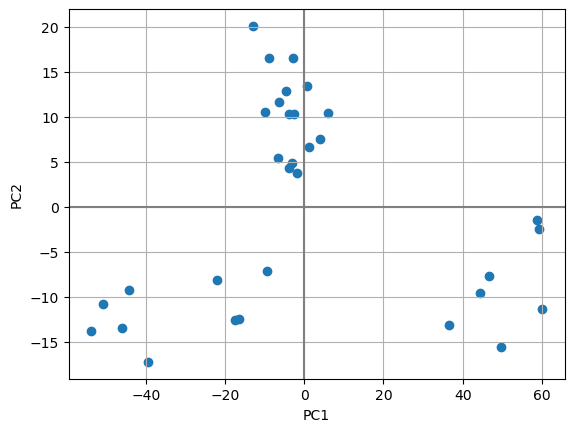

In [42]:
# Use PCA for dimensionality reduction and plot the first two components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(df)
X = pca.transform(df)

plt.scatter(X[:, 0], X[:, 1])

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


/home/quakumei/.conda/envs/py39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


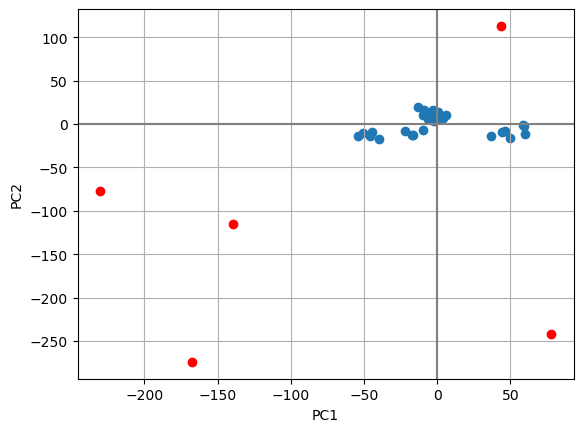

In [43]:
# Predict pca for new rgb values
new_rgb = [[255, 255, 255], [0, 0, 0], [255, 0, 0], [0, 255, 0], [0, 0, 255]]
new_rgb = pca.transform(new_rgb)

# Plot new rgb values
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(new_rgb[:, 0], new_rgb[:, 1], color='red')

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


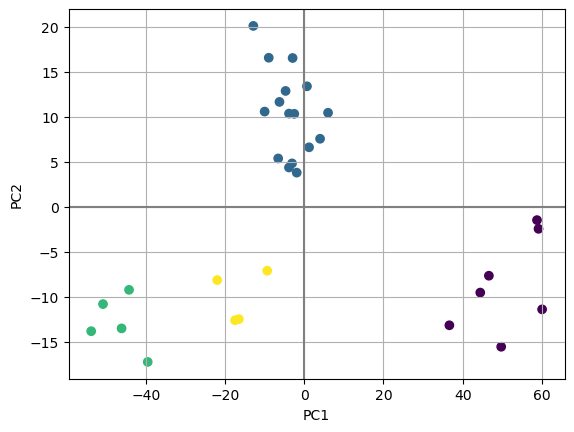

In [44]:
# Cluster data using Agglomerative Hierarchical Clustering (AHC)
from sklearn.cluster import AgglomerativeClustering

# Use Entropy truncation
ahc = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
ahc.fit(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=ahc.labels_)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()



In [45]:
# Write which colors match which clusters
for i in range(4):
    print('Cluster', i, 'contains', df[ahc.labels_ == i].index.values)


Cluster 0 contains [ 3 11 12 13 14 24 31]
Cluster 1 contains [ 4  5  6  7  8 15 17 18 19 20 22 23 26 27 29 30]
Cluster 2 contains [ 0  9 10 16 25]
Cluster 3 contains [ 1  2 21 28]


2 = 3

In [46]:
# Append cluster labels to dataframe
df['cluster'] = ahc.labels_
df.head()

,R,G,B,cluster
0,144,205,146,2
1,151,206,179,3
2,154,203,167,3
3,138,218,245,0
4,159,227,189,1


In [47]:
# Replace cluster label 3 with 2
df['cluster'] = df['cluster'].replace(3, 2)

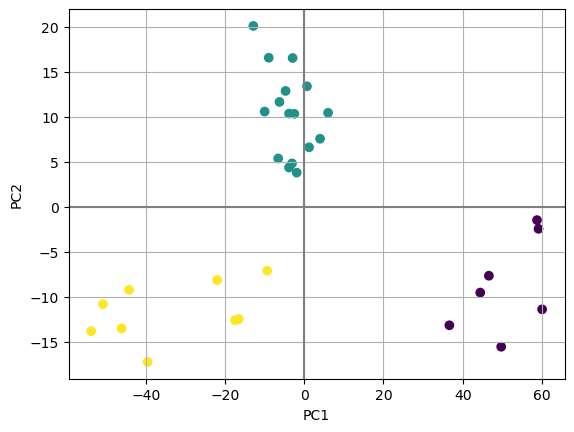

In [48]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'])

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


In [49]:
label_table = {
    0: 'сливочное',
    1: 'кокосовое',
    2: 'фальсификат',
}

# Replace cluster labels with names
df['cluster'] = df['cluster'].replace(label_table)

In [50]:
df.head()

,R,G,B,cluster
0,144,205,146,фальсификат
1,151,206,179,фальсификат
2,154,203,167,фальсификат
3,138,218,245,сливочное
4,159,227,189,кокосовое


In [51]:
# Write to csv
df.to_csv('../data/butter_rgb_with_labels.csv', index=False)

In [52]:
# Reverse replace
df['cluster'] = df['cluster'].replace({v: k for k, v in label_table.items()})
df.head()

,R,G,B,cluster
0,144,205,146,2
1,151,206,179,2
2,154,203,167,2
3,138,218,245,0
4,159,227,189,1


In [53]:
# to csv
df.to_csv('../data/butter_rgb_with_labels_numbers.csv', index=False)

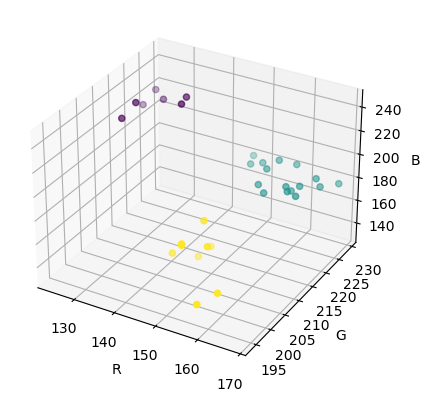

In [54]:
# Plot three-dimensional clusters according to rgb values
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['R'], df['G'], df['B'], c=df['cluster'])

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()


In [61]:
# Train KNN classifier on the RGB and cluster labels and compare performance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['R', 'G', 'B']], df['cluster'], test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict labels
y_pred = knn.predict(X_test)

# Calculate accuracy
print("KNN on RGB accuracy:", accuracy_score(y_test, y_pred))





KNN on RGB accuracy: 1.0


In [56]:
import numpy as np

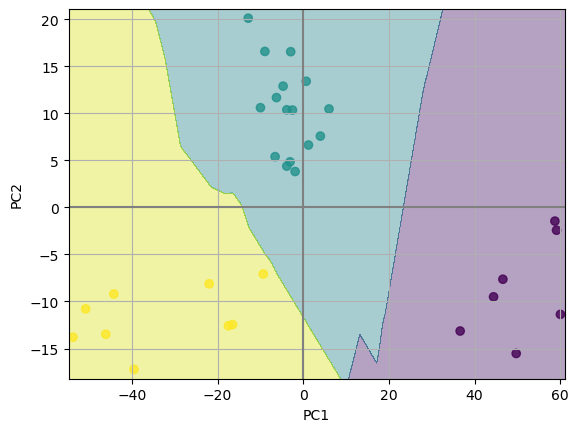

In [58]:
# Train KNN classifier on the PCA and cluster labels and compare performance
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['cluster'], test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict labels
y_pred = knn.predict(X_test)

# Calculate accuracy
print("KNN on PCA accuracy:", accuracy_score(y_test, y_pred))


# Plot the division of space into clusters for KNN on PCA

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()